In [62]:
# load packages
import numpy as np 
import scipy.io
from scipy.io   import  loadmat
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime

In [63]:
def CleanRCA(x): # replace 0's in data with nan's
    x[x == 0] = np.nan
    return x
################################################################################
# def CombineRealImg(x, NumHarms,NumBins,rca_roi,KeepHarms):
#     """ 
#     This function combines sin and cos soordinates. Specifically, per bin regardless of harmonic
#     Data is feed as a NumBinsxNumHaems x [pre/post] 
#     ie: 4 harmonics, 6 bins = [24 x 2] array, 8 CRF in total 
#       """
#     xIn = np.squeeze(x[:,rca_roi,:]) # acess the rca component of interest and combine cos and sin coordinates
#     [HarmRows,NumTrials] = xIn.shape # 48 x 39
#     #print(f'Number of Rows: {HarmRows}, Number of Trials: {HarmRows}')
#     fft_thresh = int(HarmRows/2) # real and imaginary compoents 
#     pre_post_thresh = int(NumTrials/2) # split all trials as pre and post
#     #print(f'Real and Imaginary Boundary end at row : {fft_thresh}')
#     #print(f'Trials will be split as pre post at col: {pre_post_thresh}')
#     pre = xIn[:,:pre_post_thresh] # 48 x 39
#     post = xIn[:,pre_post_thresh:] # 48 x 39

#     AmpPerBin = np.zeros((NumHarms*NumBins,2))

#     for ha in range(fft_thresh): # acess an array per harmonic indexing 
#     # access single contrast across all trials and averge response 
#         AmpPerBin[ha,0] = np.hypot(np.nanmean(pre[ha,:]),np.nanmean(pre[ha+fft_thresh,:])) # 12 x 78 PRE
#         AmpPerBin[ha,1] = np.hypot(np.nanmean(post[ha,:]),np.nanmean(post[ha+fft_thresh,:])) # 12 x 78 POST
#     # # just to double check s
#     # plt.plot(AmpPerBin[:,0],label = 'pre')
#     # plt.plot(AmpPerBin[:,1], label = 'post')
#     # for i in range((fft_thresh)):
#     #     if i % 6 == 0:  # Check if the index is divisible by 6
#     #         plt.axvline(x=i, color='b', linestyle='--')  # Plot a vertical line at this index
#     IndAmpPerBin = np.zeros((int(len(KeepHarms))*NumBins,2))
#     for k in range(len(KeepHarms)):
#         BinIn = KeepHarms[k]
#         s = (BinIn*NumBins)
#         e = s + (NumBins)
#         #print(f'start: {s}, end: {e}')
#         IndAmpPerBin[s:e,:] = AmpPerBin[s:e,:]
#     return IndAmpPerBin#AmpPerBin, IndAmpPerBin


In [222]:
NumBins = 13 # number of contrasts
NumHarms = 2#2 # number of harmonic data: 2F1, 4F1
NumConds = 4
dk_labs = ['attnL F1','attnL F2','attnR F1','attnR F2']
data_labels = ['AttnL F1, attended','AttnL F2, ~attended','AttnR F1, ~attended','AttnR F2, attended']

In [223]:
cp1 = sns.color_palette("husl", 8) # color pallete 1 
cp2 = sns.color_palette("Paired", 12)  # color pallete 2
sns.set_theme() # set global plot theme
x_lev = np.arange(0,NumBins,1) # x ticks for plotting

In [65]:
# Main Directory of processed file from MatLab
# MainDir = 'D:\\AttnXV3_analysis\\RCA_F1\\AllSubjSweepRCA\\' # set dir
MainDir = 'C:\\plimon\\LTP_analysis\\RCA_F1\\AllSubjInductRCA\\' # set dir
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Files on hand: {d}')
##############################################
FileN = d[0] # choose one                        
file_path1 = os.path.join(MainDir, FileN) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

Files on hand: ['All_Induct_RCA_20240404_171730.pkl']
Current WD: C:\plimon\LTP_analysis\RCA_F1\AllSubjInductRCA\All_Induct_RCA_20240404_171730.pkl
Does File #1 Exist? True


In [66]:
loadData = pkl.load(open(file_path1, 'rb'))
print(loadData.keys())

dict_keys([0, 1])


In [67]:
print(f'Data for double session subs')
print(loadData[0].keys())
print(f'Data for single session subs')
print(loadData[1].keys())

Data for double session subs
dict_keys([0, 1, 2, 3, 'FullSessSubjNames', 'DataNotes'])
Data for single session subs
dict_keys([0, 1, 2, 3, 'AttnLSubNames', 'AttnRSubNames'])


In [68]:
TwoSessData = loadData[0]

In [69]:
SubName = TwoSessData['FullSessSubjNames'] # suject names
NumSubs = int(len(SubName)) # number of participants 
txt = TwoSessData['DataNotes'] # notes from file imported
data2s_inds = list(TwoSessData.keys())[0:4]
data_2s = {key: TwoSessData[key] for key in data2s_inds}
print(data_2s.keys())

dict_keys([0, 1, 2, 3])


In [70]:
SingleSessData = loadData[1]

In [71]:
# import actual data 
data_1s_inds = list(SingleSessData.keys())[0:4]
data_1s = {key: SingleSessData[key] for key in data_1s_inds}
print(data_1s.keys())
# Name subs who completed attnL only + counts
attnLSubs = SingleSessData['AttnLSubNames']
NumSubs_l = int(len(attnLSubs))
print(attnLSubs, NumSubs_l)
# Name subs who completed attnR only + counts
attnRSubs = SingleSessData['AttnRSubNames']
NumSubs_r = int(len(attnRSubs))
print(attnRSubs, NumSubs_r)

dict_keys([0, 1, 2, 3])
['2660' '2708' '2715' '2716' '2727' '2733' '2734'] 7
['2663' '2663' '2676' '2678' '2726'] 5


In [72]:
data_out = {} # double session subjects
for data_set_ind in range(NumConds):
    data_out[data_set_ind] = {}  # Initialize inner dictionary for data_set_ind
    for i in range(NumSubs):
        # a dict of 4 with XSubs dict keys of data
        data_out[data_set_ind][i] = CleanRCA(np.array(data_2s[data_set_ind][i]))

In [73]:
data_out_1Sess = {} # single session subjects
for i in range(NumConds):
    data_out_1Sess[i] = {}
    if i == 0 or i == 1: 
        NSubs = NumSubs_l
    else:
        NSubs = NumSubs_r
    for j in range(NSubs):
        data_out_1Sess[i][j] = CleanRCA(np.array(data_1s[i][j]))

In [269]:
def CombineRealImg(co_File,dictIn, rca_comp):
    x = dictIn[co_File]
    iter = int(len(x.keys()))
    
    avg_list = []

    for sIn in range(iter):
        xIn = np.array(x[sIn])
        #xIn = xIn[:,:,0:10]
        [nr, nc, nt] = xIn.shape # 104 x 4 x 20]
        # reduce data to rca component of interest 
        xo = xIn[:,rca_comp,:] # 104 x 20 = 2080
        # fixed data, no harmonics, combine right down the middle
        rxo = xo[:int(nr/2),:] # 52 x 20
        ixo = xo[int(nr/2):,:]# 52 x 20 
        dOut = np.zeros((int(nr/2),nt)) # 52 x 20

        for tri in range(nt): # per trial # nt 
            mask = ~np.isnan(rxo[:, tri]) & ~np.isnan(ixo[:, tri])
            for ind in range(int(nr/2)):
                if mask[ind]:
                    dOut[ind,tri] = np.hypot(rxo[ind,tri],ixo[ind,tri])
                else:
                    dOut[ind,tri] = np.nan
                    
        avgInduc = np.nanmean(dOut, axis = 1) # 52
        avg_list.append(avgInduc)

    return avg_list

In [270]:
induction_2s = {} # double sessions 

for co in range(NumConds):
    induction_2s[co] = {}
    induction_2s[co] = CombineRealImg(dictIn = data_out,co_File = int(co), rca_comp= 0)

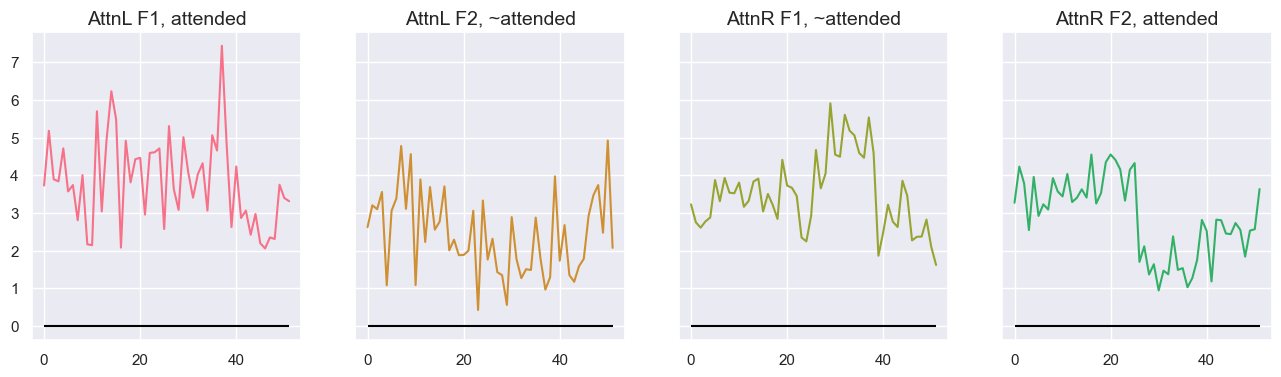

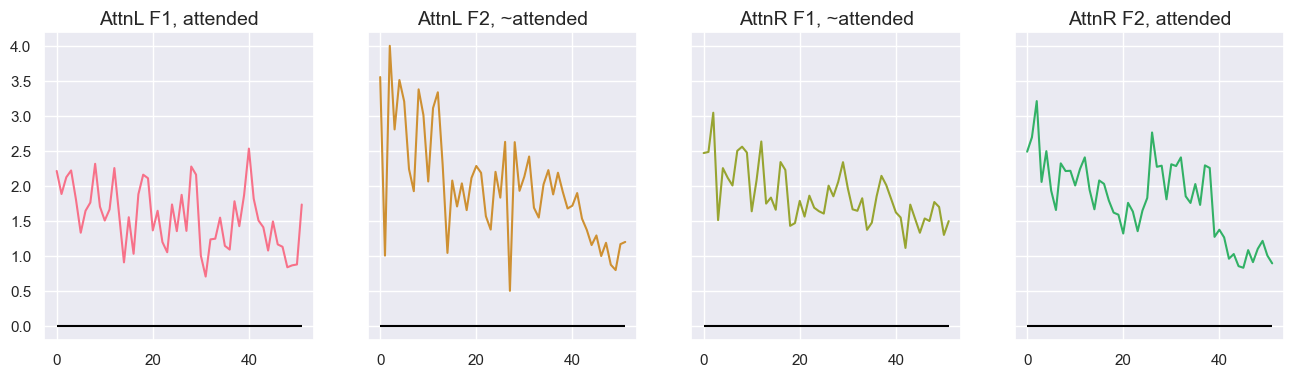

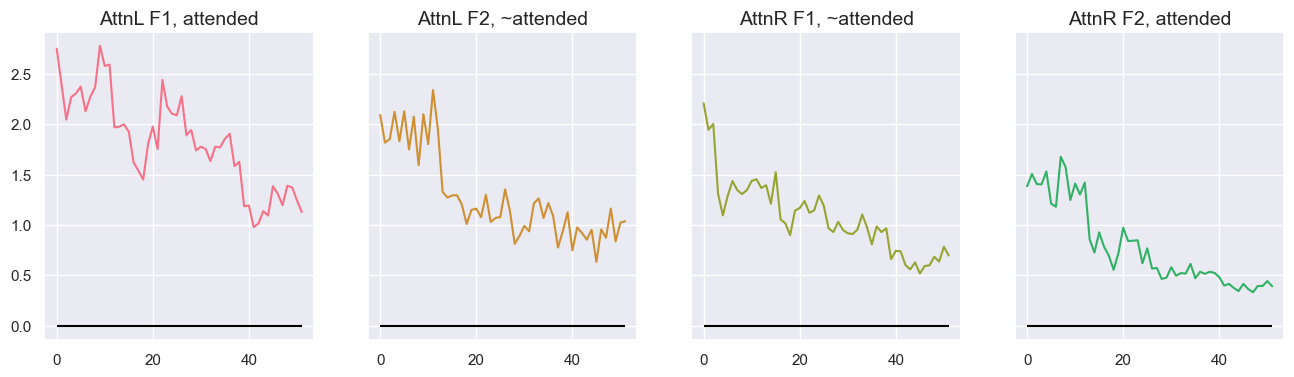

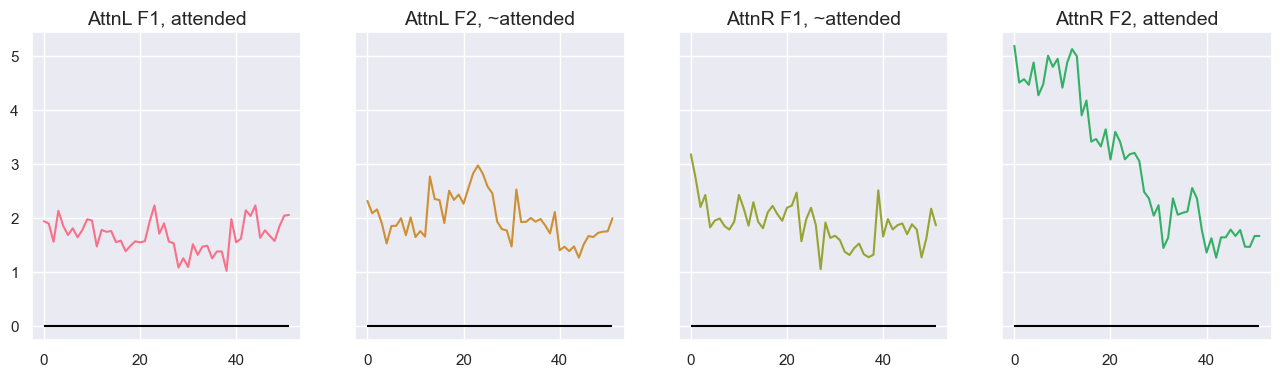

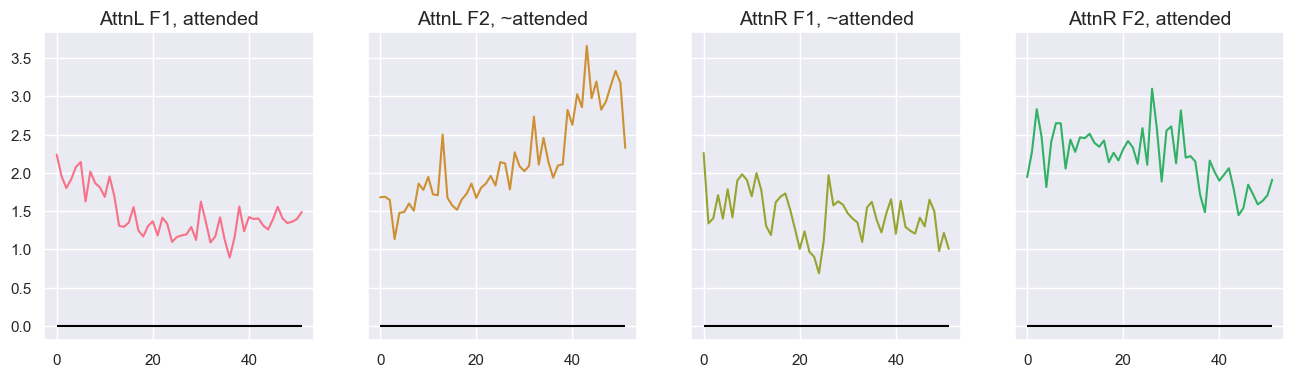

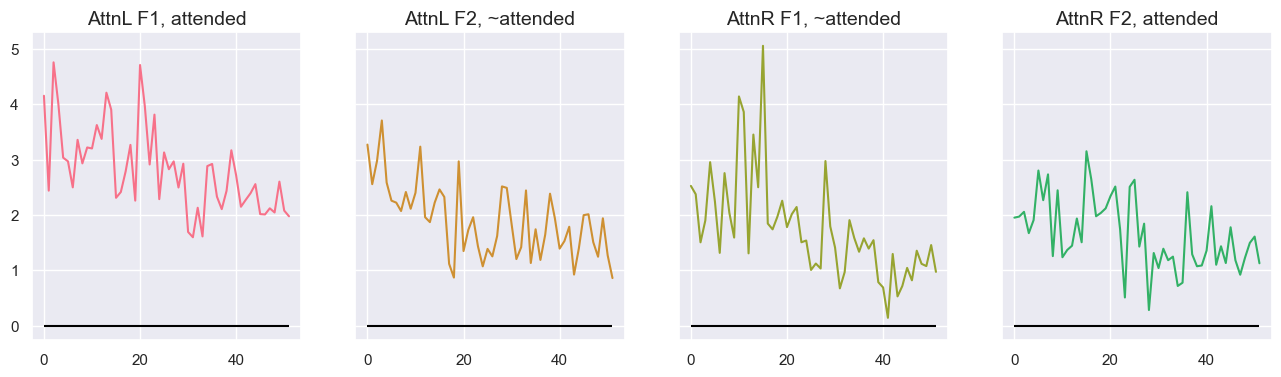

In [271]:
for sIn in range(6): # NUmSubs
    fig,axs = plt.subplots(1,4, figsize =(16,4), sharey = True)
    for c in range(NumConds):
        doi = induction_2s[c][sIn]
        axs[c].plot(doi, color = cp1[c])
        axs[c].set_title(f'{data_labels[c]}', fontsize= 14)
        axs[c].hlines(0,xmin= 0, xmax = 51, color = 'black')


In [276]:
def VisInduct(dataIn = induction_2s,sub):

    fig,axs = plt.subplots(1,figsize=(3,3))
    for co in range(NumConds):
        t = dataIn[co][sub]
        rshp = t.reshape(-1,13)  # freuencies to average and hope it works out 
        avg = np.mean(rshp,axis = 1)
        axs.scatter(np.arange(4),avg)
        plt.plot(avg, label = data_labels[co])
        induct_lab = ['1.25 mins','2.5 mins','3.75 mins','5 mins']
        plt.xticks(np.arange(4),labels = induct_lab)
        plt.legend()

        

SyntaxError: non-default argument follows default argument (2590417149.py, line 1)

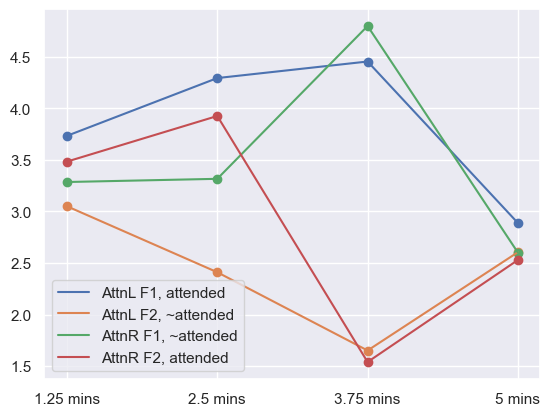

In [275]:


for co in range(NumConds):
    t = induction_2s[co][0]
    rshp = t.reshape(-1,13)  # freuencies to average and hope it works out 
    avg = np.mean(rshp,axis = 1)
    plt.scatter(np.arange(4),avg)
    plt.plot(avg, label = data_labels[co])
    induct_lab = ['1.25 mins','2.5 mins','3.75 mins','5 mins']
    plt.xticks(np.arange(4),labels = induct_lab)
    plt.legend()